In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
os.chdir('/Users/hongrudu/Desktop/COVID_Vaccination_rate/results')

In [4]:
# all_wave = pd.read_csv('results/All_ALE_CHR.csv')
pre_delta_wave = pd.read_csv('Pre-Delta_ALE_CHR.csv')
delta_wave = pd.read_csv('Delta_ALE_CHR.csv')
omicron_wave = pd.read_csv('Omicron_ALE_CHR.csv')
# all_wave = all_wave.drop(columns = ['Unnamed: 0'])
pre_delta_wave = pre_delta_wave.drop(columns = ['Unnamed: 0'])
delta_wave = delta_wave.drop(columns = ['Unnamed: 0'])
omicron_wave = omicron_wave.drop(columns = ['Unnamed: 0'])


In [5]:
data = pd.concat([pre_delta_wave, delta_wave])
data = pd.concat([data, omicron_wave])

In [6]:
var_name = ['RCPSR_lag2', 'RPI_12_Weeks_lag4', 'RGP_lag2',
       'RGV_lag2', 'ROPV_lag2', 'RUV_lag2', 'RWTR_lag2']
var_label = ['Relative complete primary series rate', 'Relative previous infections (12 weeks)', 
             'Relative government response index', 'Relative gym visits', 
             'Relative physician visits','Relative university visits', 'Relative weekly testing rate']

In [19]:
sig_label = np.empty((3, 2, 4),  dtype=object)
### RCPSR_lag2
sig_label[0, 0, 0] = 'Pre-Delta-RCHR ***'
sig_label[1, 0, 0] = 'Delta-RCHR ***'
sig_label[2, 0, 0] = 'Omicron-RCHR ***'

### RPI_12_Weeks_lag4
sig_label[0, 0, 1] = 'Pre-Delta-RCHR ***'
sig_label[1, 0, 1] = 'Delta-RCHR ***'
sig_label[2, 0, 1] = 'Omicron-RCHR ***'

### RGP_lag2
sig_label[0, 0, 2] = 'Pre-Delta-RCHR ***'
sig_label[1, 0, 2] = 'Delta-RCHR ***'
sig_label[2, 0, 2] = 'Omicron-RCHR *'

### RGV_lag2
sig_label[0, 0, 3] = 'Pre-Delta-RCHR ***'
sig_label[1, 0, 3] = 'Delta-RCHR'
sig_label[2, 0, 3] = 'Omicron-RCHR'

### ROPV_lag2
sig_label[0, 1, 0] = 'Pre-Delta-RCHR ***'
sig_label[1, 1, 0] = 'Delta-RCHR'
sig_label[2, 1, 0] = 'Omicron-RCHR **'

### RUV_lag2
sig_label[0, 1, 1] = 'Pre-Delta-RCHR'
sig_label[1, 1, 1] = 'Delta-RCHR ***'
sig_label[2, 1, 1] = 'Omicron-RCHR ***'

### RWTR_lag2
sig_label[0, 1, 2] = 'Pre-Delta-RCHR ***'
sig_label[1, 1, 2] = 'Delta-RCHR ***'
sig_label[2, 1, 2] = 'Omicron-RCHR ***'

Text(0.05, 0.9, 'l')

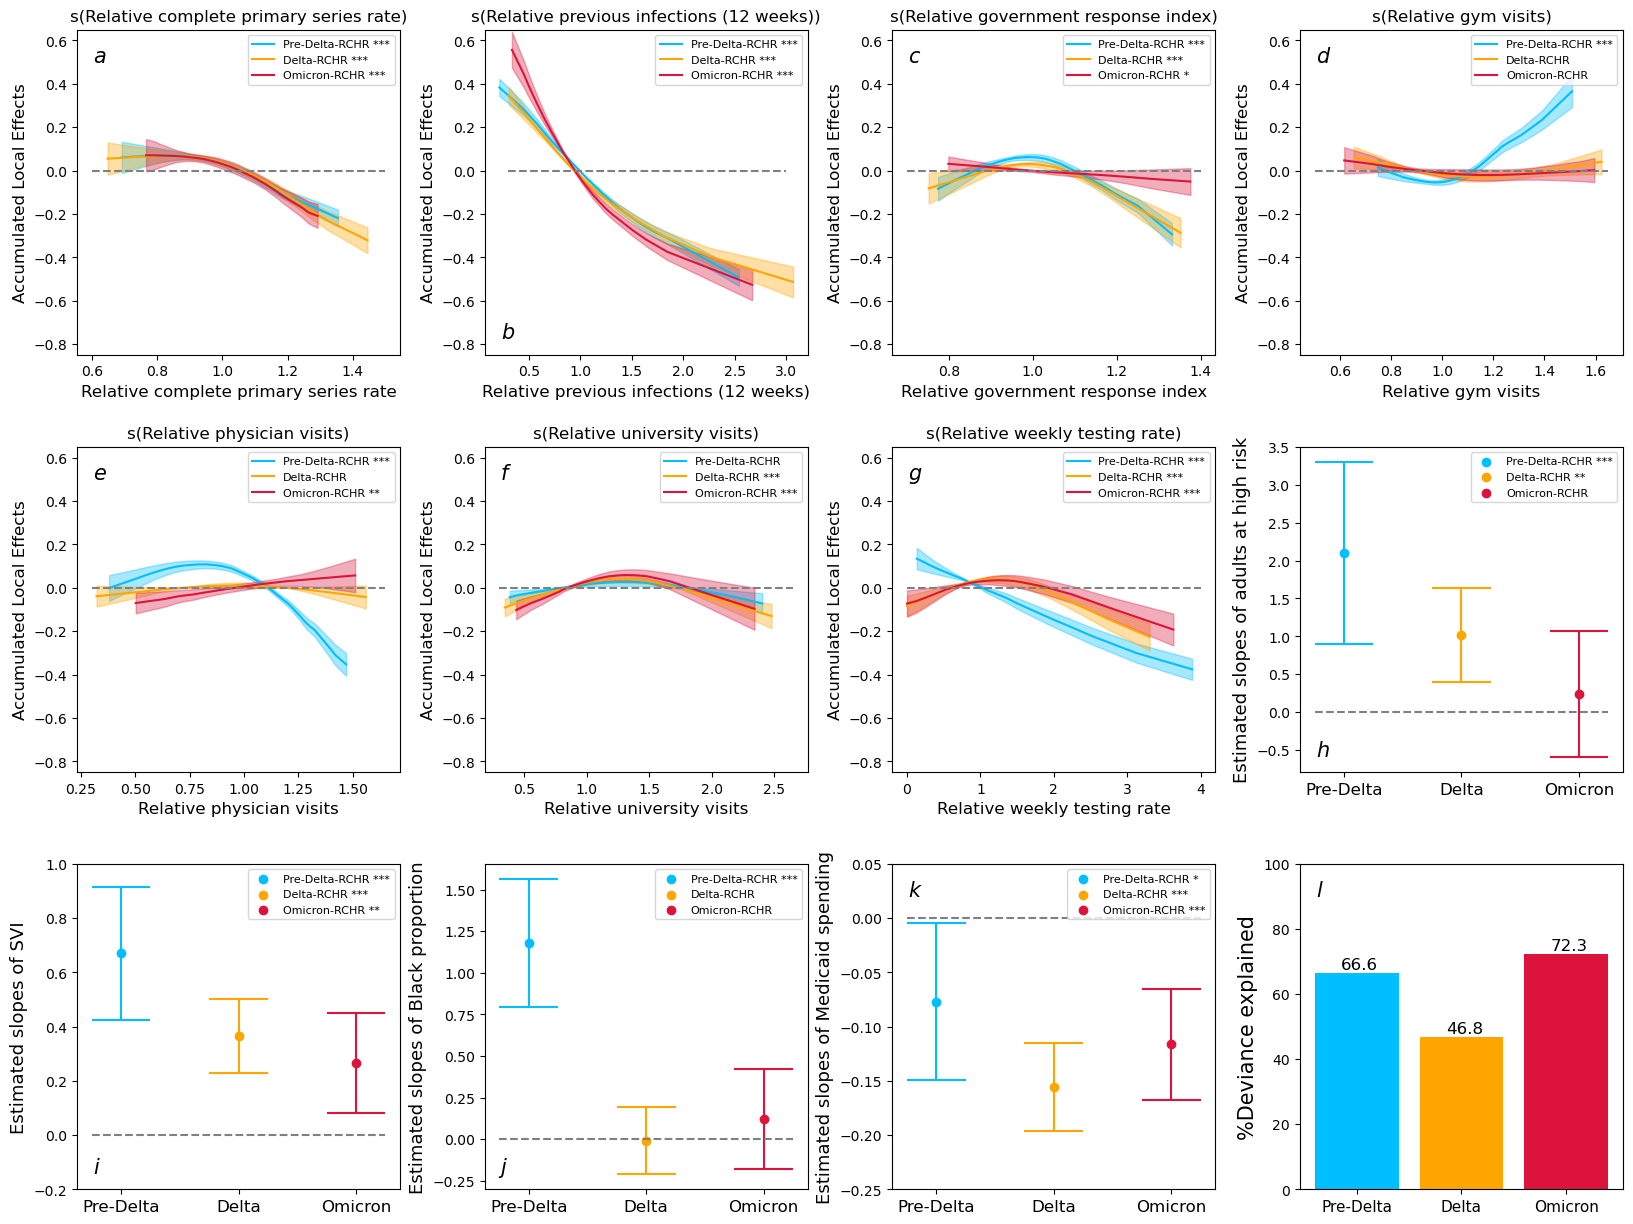

In [20]:
fig, axs = plt.subplots(3, 4, figsize = (16,12))
plt.tight_layout(pad=0.4, w_pad=3, h_pad=4.5)
# fig.delaxes(axs[2,2])
#plt.setp(axs, ylim=(-1.3, 0.85))

# fig.delaxes(axs[2,2])
# plt.setp(axs, ylim=(-1, 0.5))
for i in [0, 1]:
    for j in [0, 1, 2, 3]:
        if i + j != 4:
            plt.setp(axs[i,j], ylim=(-0.85, 0.65))
            var_others = data[(data['model'] == 'mod_others')&(data['Var'] == var_name[i*4 + j])]['var']
            var_delta = data[(data['model'] == 'mod_delta')&(data['Var'] == var_name[i*4 + j])]['var']
            var_omicron = data[(data['model'] == 'mod_omicron')&(data['Var'] == var_name[i*4 + j])]['var']
            
            est_others = data[(data['model'] == 'mod_others')&(data['Var'] == var_name[i*4 + j])]['est']
            est_delta = data[(data['model'] == 'mod_delta')&(data['Var'] == var_name[i*4 + j])]['est']
            est_omicron = data[(data['model'] == 'mod_omicron')&(data['Var'] == var_name[i*4 + j])]['est']

            se_others = data[(data['model'] == 'mod_others')&(data['Var'] == var_name[i*4 + j])]['se']
            se_delta = data[(data['model'] == 'mod_delta')&(data['Var'] == var_name[i*4 + j])]['se']
            se_omicron = data[(data['model'] == 'mod_omicron')&(data['Var'] == var_name[i*4 + j])]['se']

            axs[i,j].plot(var_others, est_others, color = 'deepskyblue', label = sig_label[0, i, j])
            axs[i,j].plot(var_delta, est_delta, color = 'orange', label = sig_label[1, i, j])
            axs[i,j].plot(var_omicron, est_omicron, color = 'crimson', label = sig_label[2, i, j])

            axs[i,j].fill_between(var_others, est_others + 1*se_others, 
                      est_others - 1*se_others, color = 'deepskyblue', alpha =.35)
            axs[i,j].fill_between(var_delta, est_delta + 1.96*se_delta, 
                      est_delta - 1.96*se_delta, color = 'orange', alpha =.35)
            axs[i,j].fill_between(var_omicron, est_omicron + 1.96*se_omicron, 
                      est_omicron - 1.96*se_omicron, color = 'crimson', alpha =.35)
            axs[i,j].legend(prop = { "size": 8 })
            axs[i,j].set_ylabel('Accumulated Local Effects', fontsize = 12)
            axs[i,j].set_xlabel(var_label[i*4 + j], fontsize = 12)
            axs[i,j].set_title('s(' + var_label[i*4 + j] + ')', fontsize = 12)
            
axs[0,0].hlines(y=0, color='grey', xmin=0.6, xmax=1.5, linestyle = '--')
axs[0,1].hlines(y=0, color='grey', xmin=0.3, xmax=3, linestyle = '--')
axs[0,2].hlines(y=0, color='grey', xmin=0.7, xmax=1.4, linestyle = '--')
axs[0,3].hlines(y=0, color='grey', xmin=0.5, xmax=1.65, linestyle = '--')
axs[1,0].hlines(y=0, color='grey', xmin=0.3, xmax=1.65, linestyle = '--')
axs[1,1].hlines(y=0, color='grey', xmin=0.3, xmax=2.65, linestyle = '--')
axs[1,2].hlines(y=0, color='grey', xmin=0, xmax=4, linestyle = '--')

####Plot parametric effects for adults at high risk
axs[1,3].set_xticks([1, 2, 3], [ 'Pre-Delta', 'Delta', 'Omicron'], fontsize = 12)


axs[1,3].scatter([1], [2.10626], color = 'deepskyblue', label = 'Pre-Delta-RCHR ***')
pre_d_upper =  2.10626 + stats.t.ppf(1-0.025, 393)*0.61165
pre_d_lower =  2.10626 - stats.t.ppf(1-0.025, 393)*0.61165
axs[1,3].hlines(y=pre_d_upper, color='deepskyblue', xmin=0.75, xmax=1.25)
axs[1,3].hlines(y=pre_d_lower, color='deepskyblue', xmin=0.75, xmax=1.25)
axs[1,3].vlines(x=1, color='deepskyblue', ymin=pre_d_lower, ymax=pre_d_upper)

axs[1,3].scatter([2], [1.021768], color = 'orange', label = 'Delta-RCHR **')
d_upper =  1.021768 + stats.t.ppf(1-0.025, 1235)*0.317168
d_lower =  1.021768 - stats.t.ppf(1-0.025, 1235)*0.317168
axs[1,3].hlines(y=d_upper, color='orange', xmin=1.75, xmax=2.25)
axs[1,3].hlines(y=d_lower, color='orange', xmin=1.75, xmax=2.25)
axs[1,3].vlines(x=2, color='orange', ymin=d_lower, ymax=d_upper)

axs[1,3].scatter([3], [0.23863], color = 'crimson', label = 'Omicron-RCHR')
o_upper =  0.23863 + stats.t.ppf(1-0.025, 494)*0.42596
o_lower =  0.23863 - stats.t.ppf(1-0.025, 494)*0.42596
axs[1,3].hlines(y=o_upper, color='crimson', xmin=2.75, xmax=3.25)
axs[1,3].hlines(y=o_lower, color='crimson', xmin=2.75, xmax=3.25)
axs[1,3].vlines(x=3, color='crimson', ymin=o_lower, ymax=o_upper)
axs[1,3].set_ylabel('Estimated slopes of adults at high risk', fontsize = 13)
axs[1,3].legend(prop = { "size": 8 })
axs[1,3].hlines(y=0, color='grey', xmin=0.75, xmax=3.25, linestyle = '--')

###############################
####Plot parametric effects for SVI
plt.setp(axs[2,0], ylim=(-0.2, 1))
axs[2,0].set_xticks([1, 2, 3], ['Pre-Delta', 'Delta', 'Omicron'], fontsize = 12)

axs[2,0].scatter([1], [0.67031], color = 'deepskyblue', label = 'Pre-Delta-RCHR ***')
pre_d_upper =  0.67031 + stats.t.ppf(1-0.025, 393)*0.12508
pre_d_lower =  0.67031 - stats.t.ppf(1-0.025, 393)*0.12508
axs[2,0].hlines(y=pre_d_upper, color='deepskyblue', xmin=0.75, xmax=1.25)
axs[2,0].hlines(y=pre_d_lower, color='deepskyblue', xmin=0.75, xmax=1.25)
axs[2,0].vlines(x=1, color='deepskyblue', ymin=pre_d_lower, ymax=pre_d_upper)

axs[2,0].scatter([2], [0.365521], color = 'orange', label = 'Delta-RCHR ***')
d_upper =  0.365521 + stats.t.ppf(1-0.025, 1235)*0.069014
d_lower =  0.365521 - stats.t.ppf(1-0.025, 1235)*0.069014
axs[2,0].hlines(y=d_upper, color='orange', xmin=1.75, xmax=2.25)
axs[2,0].hlines(y=d_lower, color='orange', xmin=1.75, xmax=2.25)
axs[2,0].vlines(x=2, color='orange', ymin=d_lower, ymax=d_upper)

axs[2,0].scatter([3], [0.26675], color = 'crimson', label = 'Omicron-RCHR **')
o_upper =  0.26675 + stats.t.ppf(1-0.025, 494)*0.0942
o_lower =  0.26675 - stats.t.ppf(1-0.025, 494)*0.0942
axs[2,0].hlines(y=o_upper, color='crimson', xmin=2.75, xmax=3.25)
axs[2,0].hlines(y=o_lower, color='crimson', xmin=2.75, xmax=3.25)
axs[2,0].vlines(x=3, color='crimson', ymin=o_lower, ymax=o_upper)
axs[2,0].set_ylabel('Estimated slopes of SVI', fontsize = 13)
axs[2,0].legend(prop = { "size": 8 })
axs[2,0].hlines(y=0, color='grey', xmin=0.75, xmax=3.25, linestyle = '--')

####Plot parametric effects for %Black
plt.setp(axs[2,2], ylim=(-0.3, 2))
axs[2,1].set_xticks([1, 2, 3], ['Pre-Delta', 'Delta', 'Omicron'], fontsize = 12)

axs[2,1].scatter([1], [1.18162], color = 'deepskyblue', label = 'Pre-Delta-RCHR ***')
pre_d_upper =  1.18162 + stats.t.ppf(1-0.025, 393)*0.19574
pre_d_lower =  1.18162 - stats.t.ppf(1-0.025, 393)*0.19574
axs[2,1].hlines(y=pre_d_upper, color='deepskyblue', xmin=0.75, xmax=1.25)
axs[2,1].hlines(y=pre_d_lower, color='deepskyblue', xmin=0.75, xmax=1.25)
axs[2,1].vlines(x=1, color='deepskyblue', ymin=pre_d_lower, ymax=pre_d_upper)

axs[2,1].scatter([2], [-0.008944], color = 'orange', label = 'Delta-RCHR')
d_upper =  -0.008944 + stats.t.ppf(1-0.025, 1235)*0.103977
d_lower =  -0.008944 - stats.t.ppf(1-0.025, 1235)*0.103977
axs[2,1].hlines(y=d_upper, color='orange', xmin=1.75, xmax=2.25)
axs[2,1].hlines(y=d_lower, color='orange', xmin=1.75, xmax=2.25)
axs[2,1].vlines(x=2, color='orange', ymin=d_lower, ymax=d_upper)

axs[2,1].scatter([3], [0.12280], color = 'crimson', label = 'Omicron-RCHR')
o_upper =  0.12280 + stats.t.ppf(1-0.025, 494)*0.15257
o_lower =  0.12280 - stats.t.ppf(1-0.025, 494)*0.15257
axs[2,1].hlines(y=o_upper, color='crimson', xmin=2.75, xmax=3.25)
axs[2,1].hlines(y=o_lower, color='crimson', xmin=2.75, xmax=3.25)
axs[2,1].vlines(x=3, color='crimson', ymin=o_lower, ymax=o_upper)
axs[2,1].set_ylabel('Estimated slopes of Black proportion', fontsize = 13)
axs[2,1].legend(prop = { "size": 8 })
axs[2,1].hlines(y=0, color='grey', xmin=0.75, xmax=3.25, linestyle = '--')

####Plot parametric effects for %Medicaid spending
plt.setp(axs[2,2], ylim=(-0.25, 0.05))
axs[2,2].set_xticks([1, 2, 3], ['Pre-Delta', 'Delta', 'Omicron'], fontsize = 12)

axs[2,2].scatter([1], [-0.07691], color = 'deepskyblue', label = 'Pre-Delta-RCHR *')
pre_d_upper =  -0.07691 + stats.t.ppf(1-0.025, 393)*0.0370
pre_d_lower =  -0.07691 - stats.t.ppf(1-0.025, 393)*0.0370
axs[2,2].hlines(y=pre_d_upper, color='deepskyblue', xmin=0.75, xmax=1.25)
axs[2,2].hlines(y=pre_d_lower, color='deepskyblue', xmin=0.75, xmax=1.25)
axs[2,2].vlines(x=1, color='deepskyblue', ymin=pre_d_lower, ymax=pre_d_upper)

axs[2,2].scatter([2], [-0.155864], color = 'orange', label = 'Delta-RCHR ***')
d_upper =  -0.155864 + stats.t.ppf(1-0.025, 1235)*0.0208
d_lower =  -0.155864 - stats.t.ppf(1-0.025, 1235)*0.0208
axs[2,2].hlines(y=d_upper, color='orange', xmin=1.75, xmax=2.25)
axs[2,2].hlines(y=d_lower, color='orange', xmin=1.75, xmax=2.25)
axs[2,2].vlines(x=2, color='orange', ymin=d_lower, ymax=d_upper)

axs[2,2].scatter([3], [-0.11646], color = 'crimson', label = 'Omicron-RCHR ***')
o_upper =  -0.11646 + stats.t.ppf(1-0.025, 494)*0.02617
o_lower =  -0.11646 - stats.t.ppf(1-0.025, 494)*0.02617
axs[2,2].hlines(y=o_upper, color='crimson', xmin=2.75, xmax=3.25)
axs[2,2].hlines(y=o_lower, color='crimson', xmin=2.75, xmax=3.25)
axs[2,2].vlines(x=3, color='crimson', ymin=o_lower, ymax=o_upper)
axs[2,2].set_ylabel('Estimated slopes of Medicaid spending', fontsize = 13)
axs[2,2].legend(prop = { "size": 8 })
axs[2,2].hlines(y=0, color='grey', xmin=0.75, xmax=3.25, linestyle = '--')

####Plot deviance explained
plt.setp(axs[2,3], ylim=(0, 100))
axs[2,3].set_xticks([1, 2, 3], ['Pre-Delta', 'Delta', 'Omicron'], fontsize = 11)
axs[2,3].bar([1], [66.6], color = 'deepskyblue')
axs[2,3].bar([2], [46.8], color = 'orange')
axs[2,3].bar([3], [72.3], color = 'crimson')
axs[2,3].set_ylabel('%Deviance explained', fontsize = 15)
axs[2,3].text(0.85, 66.6 + 1, str(66.6), color = 'black', fontsize = 12)
axs[2,3].text(1.85, 46.8 + 1, str(46.8), color = 'black', fontsize = 12)
axs[2,3].text(2.85, 72.3 + 1, str(72.3), color = 'black', fontsize = 12)

plt.text(0.05, 0.9, "a", transform=axs[0,0].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.05, "b", transform=axs[0,1].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.9, "c", transform=axs[0,2].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.9, "d", transform=axs[0,3].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.9, "e", transform=axs[1,0].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.9, "f", transform=axs[1,1].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.9, "g", transform=axs[1,2].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.05, "h", transform=axs[1,3].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.05, "i", transform=axs[2,0].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.05, "j", transform=axs[2,1].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.9, "k", transform=axs[2,2].transAxes, fontstyle = 'italic', fontsize = 15)
plt.text(0.05, 0.9, "l", transform=axs[2,3].transAxes, fontstyle = 'italic', fontsize = 15)

In [21]:
fig.savefig('/Users/hongrudu/Desktop/COVID_Vaccination_rate/figures/Figure_1.png', bbox_inches='tight', dpi=400)